# ダウ工業株30種平均 週足 メディアン統計

In [16]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [17]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'DJI'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-14 00:00:00-04:00,33000.371094,34755.199219,32818.160156,34754.929688,2166040000,0.0,0.0
2022-03-21 00:00:00-04:00,34669.851562,34942.699219,34341.808594,34861.238281,1735230000,0.0,0.0
2022-03-28 00:00:00-04:00,34833.031250,35372.261719,34538.250000,34818.269531,1745960000,0.0,0.0
2022-04-04 00:00:00-04:00,34799.980469,35112.210938,34190.949219,34721.121094,1628450000,0.0,0.0
2022-04-11 00:00:00-04:00,34630.269531,34889.171875,34102.808594,34451.230469,1334110000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,44396.921875,44769.050781,44104.480469,44546.078125,2381040000,0.0,0.0
2025-02-17 00:00:00-05:00,44583.910156,44636.191406,43349.328125,43428.019531,2061720000,0.0,0.0
2025-02-24 00:00:00-05:00,43493.121094,43884.191406,43100.871094,43840.910156,3368870000,0.0,0.0


In [18]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16 00:00:00-04:00,20917.529297,21768.279297,18917.460938,19173.980469,4087140000,0.0,0.0
2020-03-23 00:00:00-04:00,19028.359375,22595.060547,18213.650391,21636.779297,3677640000,0.0,0.0
2020-03-30 00:00:00-04:00,21678.220703,22480.369141,20735.019531,21052.529297,2602980000,0.0,0.0
2020-04-06 00:00:00-04:00,21693.630859,24008.990234,21693.630859,23719.369141,2244560000,0.0,0.0
2020-04-13 00:00:00-04:00,23698.929688,24264.210938,23095.349609,24242.490234,2314860000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,44396.921875,44769.050781,44104.480469,44546.078125,2381040000,0.0,0.0
2025-02-17 00:00:00-05:00,44583.910156,44636.191406,43349.328125,43428.019531,2061720000,0.0,0.0
2025-02-24 00:00:00-05:00,43493.121094,43884.191406,43100.871094,43840.910156,3368870000,0.0,0.0


## Moving Median

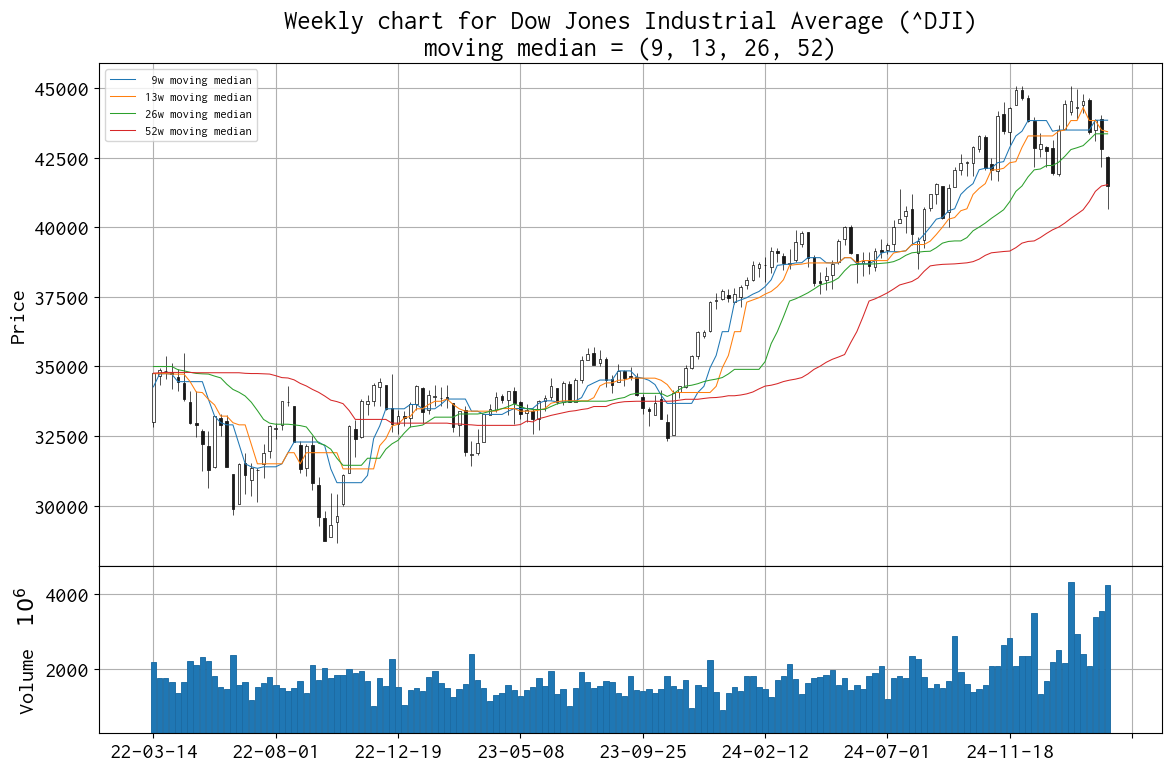

In [19]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()

apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax[0]),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (9, 13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('report_weekly_chart_median_%s.png' % code)
plt.show()

In [20]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-03 00:00:00-05:00,43900.488281,44033.781250,42175.621094,42801.718750,3537010000,0.0,0.0
2025-03-10 00:00:00-04:00,42507.648438,42541.359375,40661.769531,41488.191406,4227958083,0.0,0.0


In [21]:
df.tail(2)['Close']

Date
2025-03-03 00:00:00-05:00    42801.718750
2025-03-10 00:00:00-04:00    41488.191406
Name: Close, dtype: float64

In [22]:
df.tail(2)['Close'].diff()

Date
2025-03-03 00:00:00-05:00            NaN
2025-03-10 00:00:00-04:00   -1313.527344
Name: Close, dtype: float64

In [23]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-10 00:00:00-04:00   -1019.457031
dtype: float64

In [24]:
df['Close'].rolling(9).median().tail()

Date
2025-02-10 00:00:00-05:00    43487.828125
2025-02-17 00:00:00-05:00    43487.828125
2025-02-24 00:00:00-05:00    43840.910156
2025-03-03 00:00:00-05:00    43840.910156
2025-03-10 00:00:00-04:00    43840.910156
Name: Close, dtype: float64

In [25]:
df['Close'].rolling(13).median().tail()

Date
2025-02-10 00:00:00-05:00    44296.511719
2025-02-17 00:00:00-05:00    43828.058594
2025-02-24 00:00:00-05:00    43828.058594
2025-03-03 00:00:00-05:00    43487.828125
2025-03-10 00:00:00-04:00    43428.019531
Name: Close, dtype: float64

In [26]:
df['Close'].rolling(26).median().tail()

Date
2025-02-10 00:00:00-05:00    42928.035156
2025-02-17 00:00:00-05:00    43134.060547
2025-02-24 00:00:00-05:00    43351.964844
2025-03-03 00:00:00-05:00    43351.964844
2025-03-10 00:00:00-04:00    43351.964844
Name: Close, dtype: float64

In [27]:
df['Close'].rolling(52).median().tail()

Date
2025-02-10 00:00:00-05:00    40624.550781
2025-02-17 00:00:00-05:00    40917.419922
2025-02-24 00:00:00-05:00    41284.429688
2025-03-03 00:00:00-05:00    41478.429688
2025-03-10 00:00:00-04:00    41525.634766
Name: Close, dtype: float64

## Robust Bollinger's bands

In [28]:
period = 26
calc_robust_bollinger(df0, period)
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-03-16 00:00:00-04:00,20917.529297,21768.279297,18917.460938,19173.980469,4087140000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-23 00:00:00-04:00,19028.359375,22595.060547,18213.650391,21636.779297,3677640000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-30 00:00:00-04:00,21678.220703,22480.369141,20735.019531,21052.529297,2602980000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-06 00:00:00-04:00,21693.630859,24008.990234,21693.630859,23719.369141,2244560000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-13 00:00:00-04:00,23698.929688,24264.210938,23095.349609,24242.490234,2314860000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,44396.921875,44769.050781,44104.480469,44546.078125,2381040000,0.0,0.0,42852.060547,42054.983398,43948.755859,39214.324707,46789.414551
2025-02-17 00:00:00-05:00,44583.910156,44636.191406,43349.328125,43428.019531,2061720000,0.0,0.0,42928.035156,42076.119141,44219.630859,38860.851562,47434.898438
2025-02-24 00:00:00-05:00,43493.121094,43884.191406,43100.871094,43840.910156,3368870000,0.0,0.0,43134.060547,42164.048828,44219.630859,39080.675781,47303.003906


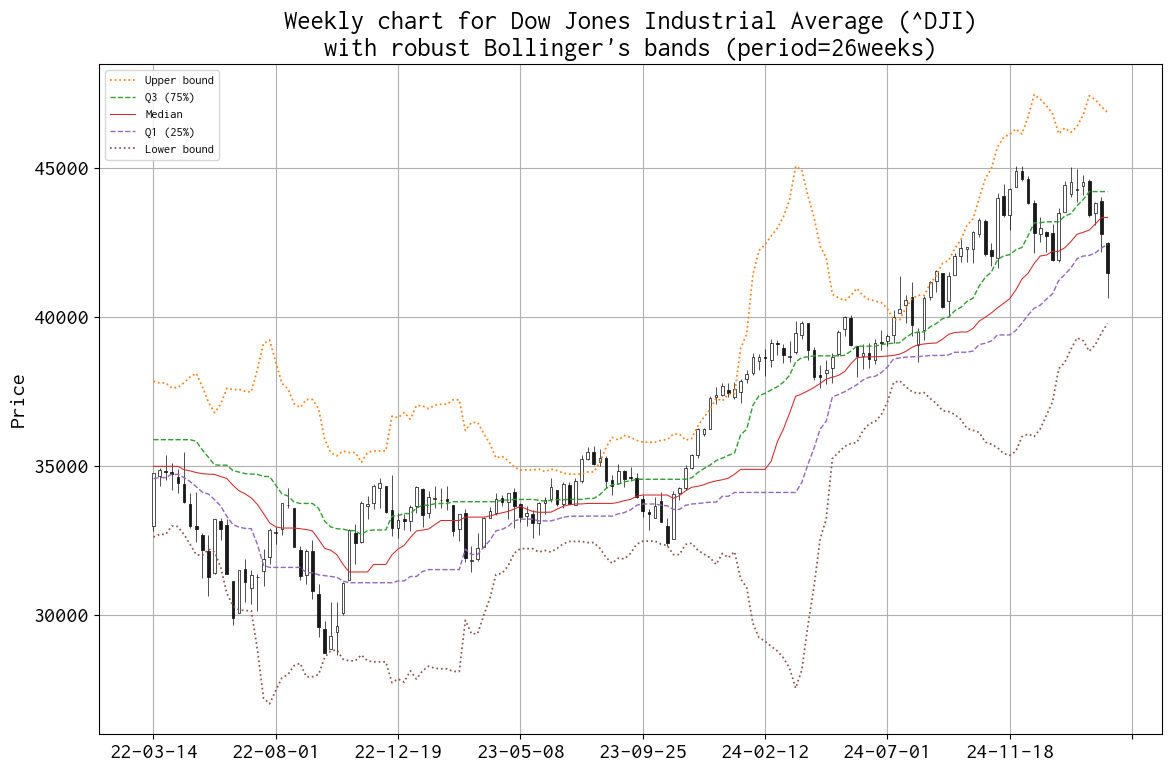

In [29]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

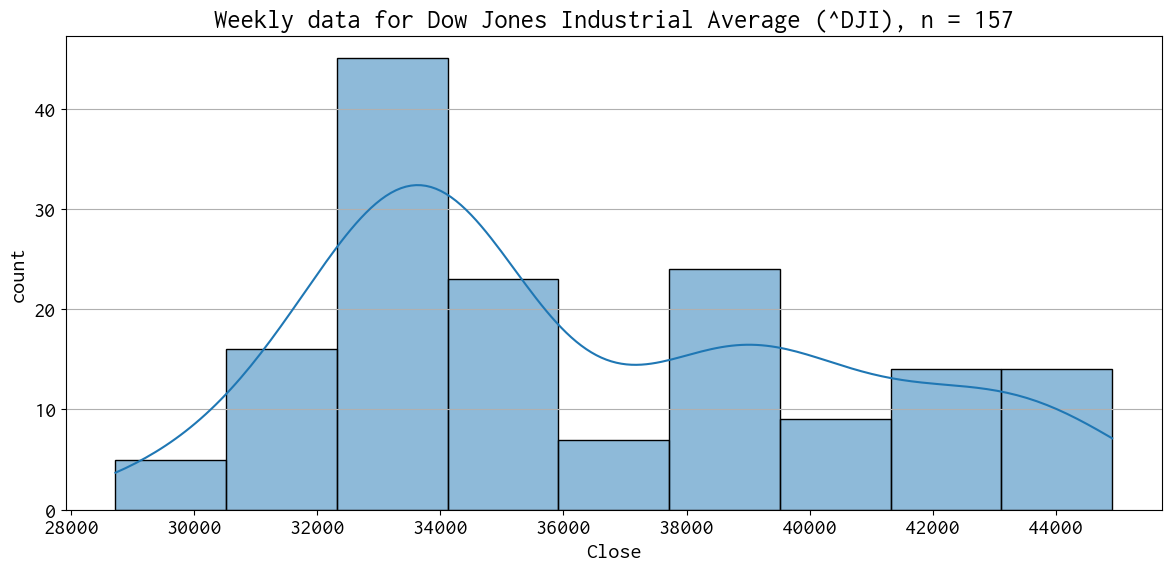

In [30]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_weekly_histogram_%s.png' % code)
plt.show()